# Data Exploration

In [1]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [7]:
NFL = pd.read_csv('./NFL_15-16_r1.csv', sep=',')
NFL.head() #to check data looks right

,date,week,day,snf,playoffs,rest,o:rest,division,o:division,conference,...,o:P4,line,total,1h diff,2h diff,1h total,2h total,div,con,d_rest
0,20150910,1,Thursday,0,0,-,-,AFC East,AFC North,AFC,...,10,-6.5,51.0,-11,4,17,32,0,1,0
1,20150913,1,Sunday,0,0,-,-,NFC North,NFC North,NFC,...,14,6.5,49.0,-3,11,23,31,1,1,0
2,20150913,1,Sunday,0,0,-,-,AFC East,AFC South,AFC,...,6,1.0,45.0,-17,4,17,24,0,1,0
3,20150913,1,Sunday,0,0,-,-,AFC West,AFC North,AFC,...,0,-4.5,47.5,-6,0,12,20,0,1,0
4,20150913,1,Sunday,0,0,-,-,NFC South,AFC South,NFC,...,0,-3.0,41.0,28,0,42,14,0,0,0


In [8]:
NFL_abr = NFL.copy()
NFL_abr = NFL_abr.drop(['date','week','day','snf','rest','o:rest','division','o:division', 'conference', 'o:conference', 'team', 'P1','P2','P3', 'P4', 'o:team', 'o:P1', 'o:P2', 'o:P3', 'o:P4'], 1)
NFL_abr.head() #check data looks right, 
#d_rest is how much extra rest home team had
#playoffs, 0=no, 1=yes
#line/total as pregame closig lines
#1h diff is actual away score minus home score in first half, same with 2h diff

,playoffs,line,total,1h diff,2h diff,1h total,2h total,div,con,d_rest
0,0,-6.5,51.0,-11,4,17,32,0,1,0
1,0,6.5,49.0,-3,11,23,31,1,1,0
2,0,1.0,45.0,-17,4,17,24,0,1,0
3,0,-4.5,47.5,-6,0,12,20,0,1,0
4,0,-3.0,41.0,28,0,42,14,0,0,0


In [9]:
#examine data for which items have direct corrilation
NFL_abr.corr()



,playoffs,line,total,1h diff,2h diff,1h total,2h total,div,con,d_rest
playoffs,1.000000,-0.076276,0.030492,-0.068470,-0.037909,-0.019923,0.021716,-0.129809,0.111833,0.193974
line,-0.076276,1.000000,-0.029157,0.275265,0.332533,-0.044301,-0.040330,0.050216,-0.005802,-0.046935
total,0.030492,-0.029157,1.000000,-0.057641,0.056313,0.239538,0.274408,-0.088755,-0.060022,-0.000971
1h diff,-0.068470,0.275265,-0.057641,1.000000,-0.097716,-0.050577,-0.002297,0.055006,0.015654,-0.071846
2h diff,-0.037909,0.332533,0.056313,-0.097716,1.000000,0.054226,-0.071854,0.024908,-0.064529,-0.007855
1h total,-0.019923,-0.044301,0.239538,-0.050577,0.054226,1.000000,0.032960,-0.094396,-0.010371,0.059070
2h total,0.021716,-0.040330,0.274408,-0.002297,-0.071854,0.032960,1.000000,0.057905,0.050963,0.002208
div,-0.129809,0.050216,-0.088755,0.055006,0.024908,-0.094396,0.057905,1.000000,0.424954,-0.022446
con,0.111833,-0.005802,-0.060022,0.015654,-0.064529,-0.010371,0.050963,0.424954,1.000000,0.056903
d_rest,0.193974,-0.046935,-0.000971,-0.071846,-0.007855,0.059070,0.002208,-0.022446,0.056903,1.000000


In [ ]:
#2h diff  correlated to mainly just pregame line. 
#2h total correlated mainly to just pregame total. 
#not directly correlated to 1h results in either case


In [10]:
# examine ranges of values for each column 
NFL_abr.describe(percentiles=[0,.1,.2,.5,.8,.9,1])


,playoffs,line,total,1h diff,2h diff,1h total,2h total,div,con,d_rest
count,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.000000,525.00000,525.000000
mean,0.038095,-2.220000,45.407619,-2.114286,-0.110476,22.788571,22.438095,0.363810,0.76000,0.036190
std,0.191609,5.170811,3.543290,10.722661,9.403141,8.884278,9.740648,0.481554,0.42749,2.632849
min,0.000000,-17.000000,37.000000,-41.000000,-39.000000,3.000000,0.000000,0.000000,0.00000,-8.000000
0%,0.000000,-17.000000,37.000000,-41.000000,-39.000000,3.000000,0.000000,0.000000,0.00000,-8.000000
10%,0.000000,-8.000000,41.000000,-16.000000,-13.000000,12.000000,10.000000,0.000000,0.00000,-3.000000
20%,0.000000,-6.500000,42.500000,-11.000000,-8.000000,16.000000,14.000000,0.000000,0.00000,0.000000
50%,0.000000,-3.000000,45.000000,-3.000000,0.000000,23.000000,21.000000,0.000000,1.00000,0.000000
80%,0.000000,3.000000,48.500000,7.000000,7.200000,30.000000,30.000000,1.000000,1.00000,0.000000
90%,0.000000,4.500000,50.000000,11.000000,11.000000,34.000000,35.000000,1.000000,1.00000,3.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x117619ac8>]], dtype=object)

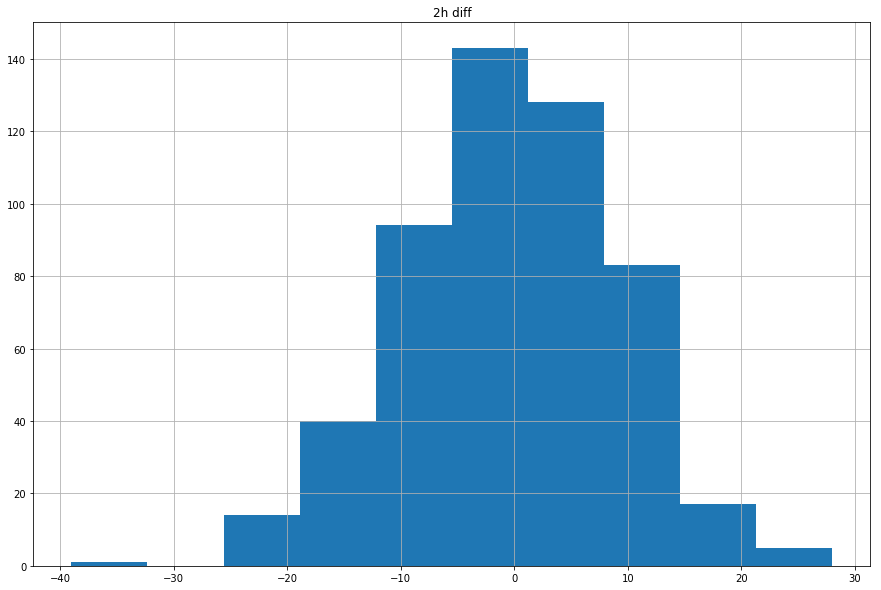

In [13]:
# examine ranges of 2h differences
NFL.hist(column='2h diff', figsize=(15,10))

# NFL line data prep

In [15]:
NFL_class=NFL.copy()
## don't have info for what the 2nd half line was at halftime in this dataset 
## so just used the 50th percentile value for 2h difference as a generic line
## could also make half the pregame full line
line_NFL=0
##### set total same methodology as above
total_NFL=21
print(NFL_class.shape[0])

# make column of whether home team covered the arbitrary line set above and whether total went over
# yes = 1, no = 0
NFL_class['home_line']=(NFL_class['2h diff']<line_NFL)*1
NFL_class['2h_total_line']=(NFL_class['2h total']>total_NFL)*1
NFL_class.head()


525


,date,week,day,snf,playoffs,rest,o:rest,division,o:division,conference,...,total,1h diff,2h diff,1h total,2h total,div,con,d_rest,home_line,2h_total_line
0,20150910,1,Thursday,0,0,-,-,AFC East,AFC North,AFC,...,51.0,-11,4,17,32,0,1,0,0,1
1,20150913,1,Sunday,0,0,-,-,NFC North,NFC North,NFC,...,49.0,-3,11,23,31,1,1,0,0,1
2,20150913,1,Sunday,0,0,-,-,AFC East,AFC South,AFC,...,45.0,-17,4,17,24,0,1,0,0,1
3,20150913,1,Sunday,0,0,-,-,AFC West,AFC North,AFC,...,47.5,-6,0,12,20,0,1,0,0,0
4,20150913,1,Sunday,0,0,-,-,NFC South,AFC South,NFC,...,41.0,28,0,42,14,0,0,0,0,0


In [16]:
#non-playoffs only
NFL_class=NFL_class[NFL_class['playoffs']==0]
print(NFL_class.shape[0])

505


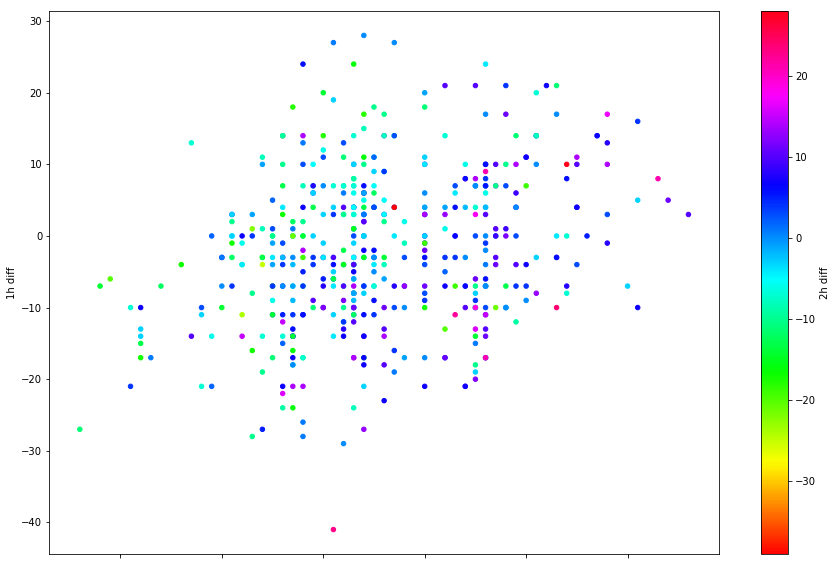

In [17]:
# trying out plot function to try to compare pregame line, 1h diff and 2h diff
NFL_class.plot.scatter('line','1h diff',figsize=(15,10),c='2h diff',cmap=plt.cm.hsv)


In [51]:
y_line_F=NFL_class[['home_line']].copy()
y_total_F=NFL_class[['2h_total_line']].copy()

#originally included but then removed other columns because
#in previous tries they had little impact to accuracy and showed low correlation in table. 

X_line_F=NFL_class[['1h diff','line','total','1h total']]  ##omit day rest diff
X_total_F=NFL_class[['1h diff','line','total','1h total']]  


In [52]:
# seperate data into training and test data randomly.
x_train_F_L, x_test_F_L, y_train_F_L, y_test_F_L = train_test_split(X_line_F, y_line_F, test_size=0.33)
x_train_F_T, x_test_F_T, y_train_F_T, y_test_F_T = train_test_split(X_total_F, y_total_F, test_size=0.33)


In [53]:
# try difference Machining learning functions and compare results. 
# the 2h line and total set are arbitrary so results are just a preliminary look at which methods work well. 

ada_class_F_L = AdaBoostClassifier()
ada_class_F_T = AdaBoostClassifier()
gnb_class_F_L = GaussianNB()
gnb_class_F_T = GaussianNB()
fst_class_F_L = RandomForestClassifier()
fst_class_F_T = RandomForestClassifier()



In [54]:
pred_ada_F_L = ada_class_F_L.fit(x_train_F_L, y_train_F_L).predict(x_test_F_L)
pred_ada_F_T = ada_class_F_T.fit(x_train_F_T, y_train_F_T).predict(x_test_F_T)
pred_gnb_F_L = gnb_class_F_L.fit(x_train_F_L, y_train_F_L).predict(x_test_F_L)
pred_gnb_F_T = gnb_class_F_T.fit(x_train_F_T, y_train_F_T).predict(x_test_F_T)
pred_fst_F_L = fst_class_F_L.fit(x_train_F_L, y_train_F_L).predict(x_test_F_L)
pred_fst_F_T = fst_class_F_T.fit(x_train_F_T, y_train_F_T).predict(x_test_F_T)

/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  

In [55]:
cross_val_score(y_true = y_test_F_L, y_pred = pred_ada_F_L)

0.6586826347305389

In [56]:
accuracy_score(y_true = y_test_F_L, y_pred = pred_gnb_F_L)

0.64071856287425155

In [57]:
accuracy_score(y_true = y_test_F_L, y_pred = pred_fst_F_L)

0.6227544910179641

In [58]:
accuracy_score(y_true = y_test_F_T, y_pred = pred_ada_F_T)

0.60479041916167664

In [59]:
accuracy_score(y_true = y_test_F_T, y_pred = pred_gnb_F_T)

0.57485029940119758

In [60]:
accuracy_score(y_true = y_test_F_T, y_pred = pred_fst_F_T)

0.51497005988023947